In [47]:
import pandas as pd

data = pd.read_csv("./ion.csv", index_col=0)

In [48]:
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [49]:
y = data.Class
X = data.drop(["Class"], axis=1)
X.dropna(axis=1, inplace = True)




In [50]:
from sklearn.model_selection import train_test_split

In [51]:
y = y.map({"good": 0, "bad": 1})

In [52]:
min_ = X.min(axis=0)
max_ = X.max(axis=0)

x = (X-min_) / (max_ - min_)

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state=0)

In [58]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=[X_train.shape[1]]),
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])



In [59]:
model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"]
)

In [61]:
early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001, patience=10, restore_best_weights=True
)

In [62]:
history = model.fit(
    X_train, y_train, validation_data=[X_valid, y_valid], verbose=True, batch_size=512, epochs=1000, callbacks=[early_stopping]
)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - binary_accuracy: 0.3306 - loss: 0.7552 - val_binary_accuracy: 0.3868 - val_loss: 0.7519
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - binary_accuracy: 0.3184 - loss: 0.7501 - val_binary_accuracy: 0.3774 - val_loss: 0.7477
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - binary_accuracy: 0.3143 - loss: 0.7451 - val_binary_accuracy: 0.3585 - val_loss: 0.7435
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - binary_accuracy: 0.3143 - loss: 0.7403 - val_binary_accuracy: 0.3491 - val_loss: 0.7395
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - binary_accuracy: 0.3143 - loss: 0.7357 - val_binary_accuracy: 0.3491 - val_loss: 0.7356
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - binary_accuracy: 0.3102 - loss: 0.7313 - val_binary_accuracy: 0.3491 - val_loss: 0.7319
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - binary_accuracy: 0.3102 - loss: 0.7270 - val_binary_accuracy: 0.3491 - val_loss: 0.7283
Epoch 8/1000
1/

<Axes: >

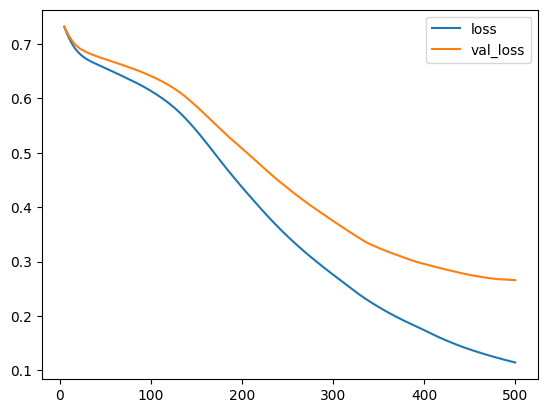

In [64]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:,["loss", "val_loss"]].plot()


<Axes: >

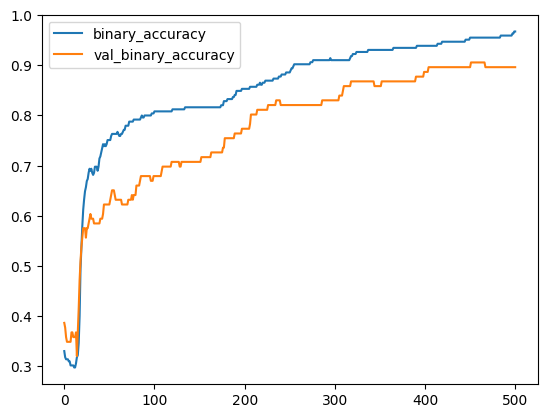

In [65]:
history_df.loc[:,["binary_accuracy","val_binary_accuracy"]].plot()

In [66]:
history_df.loc[:,"val_binary_accuracy"].max()

0.9056603908538818